In [226]:
import pandas as pd
import numpy as np

# Carregando os dados e realizando o pré-processamento
dados1 = pd.read_csv("shopping_trends_updated.csv")
dados = dados1.drop(["Age","Purchase Amount (USD)", "Location", "Customer ID", "Review Rating", "Subscription Status",
                    "Shipping Type", "Discount Applied", "Promo Code Used", "Previous Purchases", "Payment Method",
                    "Frequency of Purchases", "Item Purchased"], axis=1)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
colunas_categoria = ["Gender", "Category", "Size", "Color", "Season"]

for coluna in colunas_categoria:
    le.fit(dados[coluna])
    dados[coluna] = le.transform(dados[coluna])


In [227]:
dados1.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [234]:
dados.head()

,Gender,Category,Size,Color,Season,cluster
0,1,1,0,7,3,2
1,1,1,0,12,3,2
2,1,1,2,12,1,1
3,1,2,1,12,1,3
4,1,1,1,21,1,1


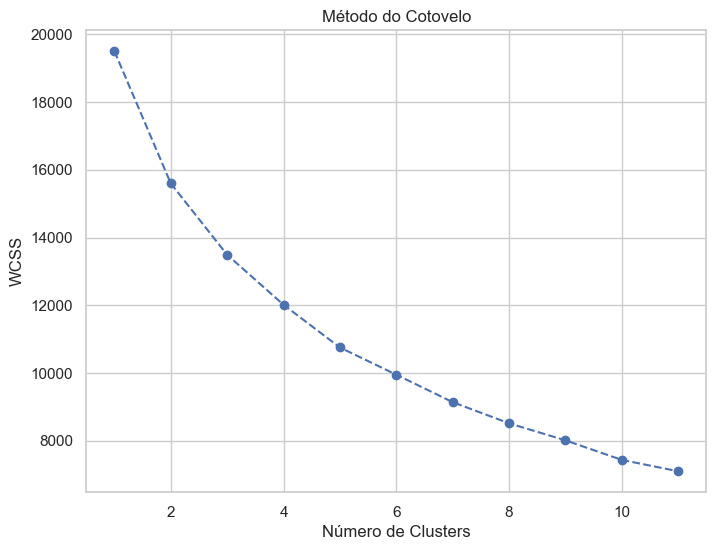

In [228]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Padronizando os dados
scaler = StandardScaler()
dado_scale = scaler.fit_transform(dados)

# Aplicando o Método do Cotovelo para determinar o número ideal de clusters
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=42)
    kmeans.fit(dado_scale)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 12), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


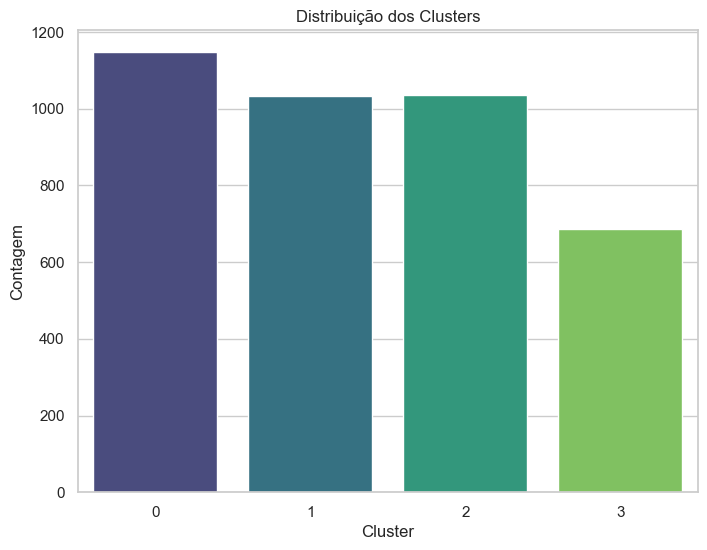

In [229]:
# Realizando a clusterização
kmeans = KMeans(n_clusters=4, max_iter=300, n_init=10, random_state=42)
dados["cluster"] = kmeans.fit_predict(dado_scale)

import seaborn as sns

# Contagem dos clusters
cluster_counts = dados['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

# Criando um gráfico de barras para visualização
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Count', data=cluster_counts, palette='viridis')
plt.title('Distribuição dos Clusters')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.show()


In [230]:
from sklearn.metrics import silhouette_score

# Calculando o índice Silhouette médio para avaliar a qualidade dos clusters
silhouette_avg = silhouette_score(dado_scale, dados['cluster'])
print(f"Índice Silhouette médio: {silhouette_avg}")


Índice Silhouette médio: 0.19476244259198963


In [231]:
dados1["cluster"] = dados["cluster"]
dados1.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,cluster
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,2
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,2
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,3
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,1


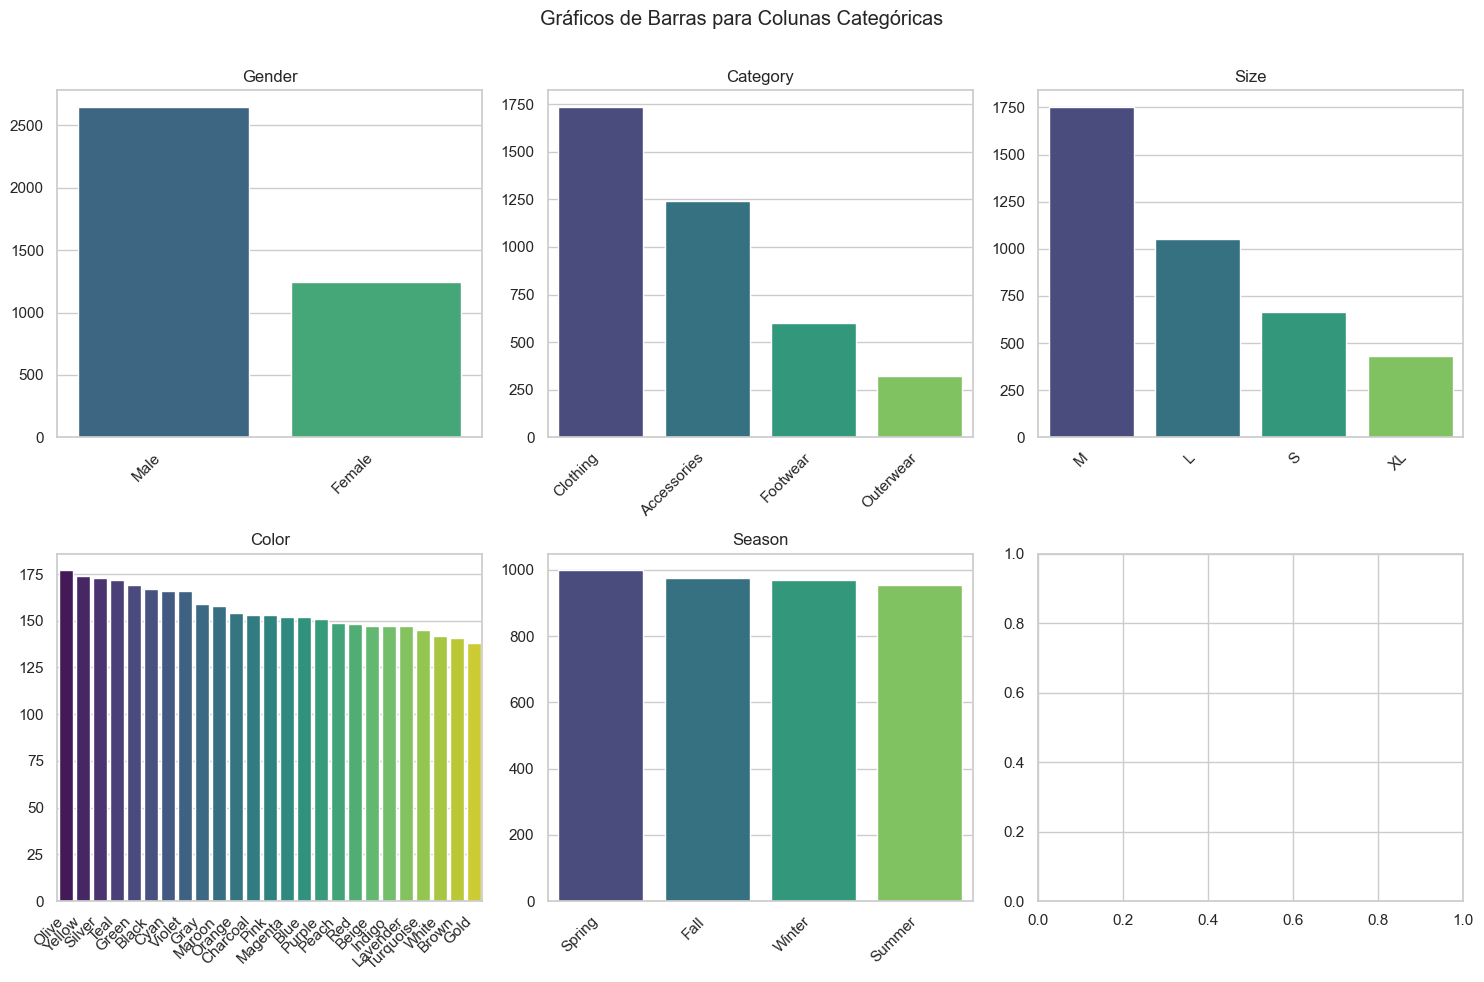

In [233]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Gráficos de Barras para Colunas Categóricas")

# Criar gráficos de barras para cada coluna categórica
for i, coluna in enumerate(colunas_categoria):
    row, col = i // 3, i % 3
    ax = axs[row, col]
    
    # Contagem das categorias
    counts = dados1[coluna].value_counts()
    
    # Criar o gráfico de barras
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="viridis")
    ax.set_title(coluna)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Ajustar o layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()